**Python solutions to Gary Koop's "Analysis of Economic Data" (4th ed., 2013)**

**Chapter 4: Introduction to Simple Regression**

Jakub Janus, jakub.janus@uek.krakow.pl

# Exercise 4.1
The FOREST.XLS data set contains data on deforestation (Y), population density
(X), change in cropland (W) and change in pasture land (Z).
(a) Run a regression of Y on X and interpret the results.

In [1]:
import pandas as pd
import statsmodels.api as sm
forest = pd.read_excel(r'datasets\FOREST.xls')
Y = forest['Forest loss']
X = forest['Pop dens']
W = forest['Crop ch']
Z = forest['Pasture ch']
# Regression
formula_Y_X = sm.OLS(Y, sm.add_constant(X))
reg_Y_X = formula_Y_X.fit()
reg_Y_X.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Forest loss   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     52.24
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           5.50e-10
Time:                        13:25:15   Log-Likelihood:                -73.655
No. Observations:                  70   AIC:                             151.3
Df Residuals:                      68   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6000      0.112      5.342      0.000       0.376       0.824
Pop dens       0.0008      0.000      7.228      0.000       0.001       0.001
==============================================================================
Omnibus:                       21.745   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.165
Skew:                           1.136   Prob(JB):                     1.40e-08
Kurtosis:                       5.691   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(b) Run a regression of Y on W and one of Y on Z and interpret the results.

In [2]:
#Results using Stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
formula_Y_W = sm.OLS(Y, sm.add_constant(W))
reg_Y_W = formula_Y_W.fit()
formula_Y_Z = sm.OLS(Y, sm.add_constant(Z))
reg_Y_Z = formula_Y_Z.fit()
stargazer_reg_Y_W_reg_Y_Z = Stargazer([reg_Y_W, reg_Y_Z])
HTML(stargazer_reg_Y_W_reg_Y_Z.render_html())

(c) Create a new variable, V, by dividing X by 100. What are the units in terms
of which V is measured?

In [3]:
V = X / 100

(d) Run a regression of Y on V. Compare your results to those for part (a). How do you interpret your coefficient estimate of $\beta$? How does x differ between part (a) and part (d)?

In [4]:
formula_Y_V = sm.OLS(Y, sm.add_constant(V))
reg_Y_V = formula_Y_V.fit()
HTML(Stargazer([reg_Y_V]).render_html())

(e) Experiment with scaling dependent and explanatory variables (i.e. by dividing
them by a constant) and see what effect this has on your coefficient
estimates.

In [5]:
W1 = W / 2
Z1 = [(z - Z.mean()) / Z.std() for z in Z]
formula_Y_W1 = sm.OLS(Y, sm.add_constant(W1))
reg_Y_W1 = formula_Y_W1.fit()
formula_Y_Z1 = sm.OLS(Y, sm.add_constant(Z1))
reg_Y_Z1 = formula_Y_Z1.fit()
stargazer_reg_Y_W1_reg_Y_Z1 = Stargazer([reg_Y_W1, reg_Y_Z1])
HTML(stargazer_reg_Y_W1_reg_Y_Z1.render_html())

# Exercise 4.2
Using the data in FOREST.XLS (see Exercise 4.1), run a regression of Y on X and
compare the actual observations to the fitted values.

In [6]:
formula_Y_X = sm.OLS(Y, sm.add_constant(X))
reg_Y_X = formula_Y_X.fit()
fitted_reg_Y_X = reg_Y_X.fittedvalues
compare = pd.DataFrame(columns = ['X', 'Y', 'fitted Y'])
compare['X'] = X
compare['Y'] = Y
compare['fitted Y'] = fitted_reg_Y_X
compare

,X,Y,fitted Y
0,357.0,0.7,0.900676
1,48.0,0.7,0.640397
2,932.0,0.8,1.385014
3,366.0,0.7,0.908257
4,83.0,0.8,0.669878
...,...,...,...
65,327.0,0.6,0.875406
66,409.0,1.7,0.944477
67,117.0,2.4,0.698517
68,179.0,0.4,0.750741


In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(compare['X'], compare['Y'], s = 10, c = 'r', marker = 'o', label = 'Y')
ax.scatter(compare['X'], compare['fitted Y'], s=10, c = 'g', marker = 'o', label = 'fitted Y')
ax.set_xlabel('X')
plt.legend(loc = 'upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

# Exercise 4.3
(a) Using the data in FOREST.XLS (see Exercise 4.1) run a regression of Y on X and obtain the residuals. How would you interpret the residuals? Are there
any outliers?

0    -0.200676
1     0.059603
2    -0.585014
3    -0.208257
4     0.130122
        ...   
65   -0.275406
66    0.755523
67    1.701483
68   -0.350741
69    0.402931
Length: 70, dtype: float64


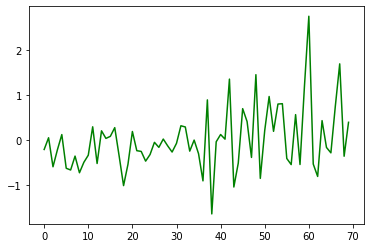

In [8]:
residuals_reg_Y_X = reg_Y_X.resid
print(residuals_reg_Y_X)
residuals_reg_Y_X.plot(c = 'g');

(b) Repeat part (a) for the other variables, W and Z in this data set.

0     20.553067
1     -6.095279
2      7.987368
3     10.566126
4     -5.544495
        ...    
65    -3.290461
66     2.128517
67    19.004837
68    -1.505203
69    -3.225401
Length: 70, dtype: float64


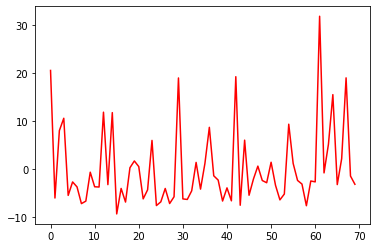

In [9]:
formula_W_X = sm.OLS(W, sm.add_constant(X))
reg_W_X = formula_W_X.fit()
residuals_reg_W_X = reg_W_X.resid
print(residuals_reg_W_X)
residuals_reg_W_X.plot(c = 'r');

0     -2.711843
1     -2.393448
2     -3.304326
3     -2.721116
4     -2.429512
        ...    
65     3.119069
66    26.434576
67    31.035455
68    -2.528431
69     0.314897
Length: 70, dtype: float64


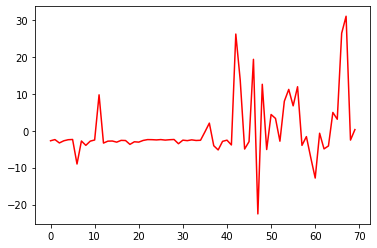

In [10]:
formula_Z_X = sm.OLS(Z, sm.add_constant(X))
reg_Z_X = formula_Z_X.fit()
residuals_reg_Z_X = reg_Z_X.resid
print(residuals_reg_Z_X)
residuals_reg_Z_X.plot(c = 'b');

#Exercise 4.4
(a) Using the data in FOREST.XLS (see Exercise 4.1) run a regression of Y on
X. What is R2?


In [11]:
rsquared_reg_Y_X = reg_Y_X.rsquared
rsquared_reg_Y_X

0.43447889049101684

(b) Calculate the correlation between Y and X.

In [12]:
cor_Y_X = X.corr(Y)
cor_Y_X

0.6591501274300242

(c) Discuss the relationship between your answers in parts (a) and (b).

In [13]:
(cor_Y_X**2).round(10) ==  rsquared_reg_Y_X.round(10)

True

(d) Redo part (a) for various regressions involving the variables W, X, Y and Z
in the data set. Comment on the fit of each of these regressions.

# Exercise 4.5
Using the data in FOREST.XLS examine different XY-plots involving the variables
X, Y, W and Z (see Exercise 4.1 for a definition of these variables). Does
there seem to be a nonlinear relationship between any pair of variables? Repeat
the exercise using the data in the advertising example (ADVERT.XLS).

# Exercise 4.6
Data set EX46.XLS contains two variables, labeled Y and X.

(a) Make an XY-plot of these two variables. Does the relationship between Y and
X appear to be linear?

(b) Calculate the square root of variable X.

(c) Make an XY-plot of the square root of X against Y. Does this relationship appear to be linear?

# Exercise 4.7
Use the data in Example 4.1 (costs of production in the electricity utility industry,
ELECTRIC.XLS), where Y is the cost of production and X is the output.

(a) Run a regression of Y on X.

In [14]:
electric = pd.read_excel(r'datasets\ELECTRIC.xls').drop([0, 0]).reset_index()
X = electric['Cost'].astype(float)
Y = electric['Output'].astype(float)
formula_Y_X = sm.OLS(Y, sm.add_constant(X))
reg_Y_X = formula_Y_X.fit()
reg_Y_X.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1323.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           5.36e-67
Time:                        13:25:16   Log-Likelihood:                -1169.5
No. Observations:                 123   AIC:                             2343.
Df Residuals:                     121   BIC:                             2349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        317.0380    376.683      0.842      0.402    -428.705    1062.781
Cost         191.3326      5.260     36.376      0.000     180.919     201.746
==============================================================================
Omnibus:                       51.127   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1013.014
Skew:                           0.743   Prob(JB):                    1.06e-220
Kurtosis:                      16.980   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Take a log transformation of both variables.

In [15]:
import numpy as np
Y_log = np.log(Y)
X_log = np.log(X)

(c) Run a regression of ln(Y) on ln(X) and interpret your results verbally.

In [16]:
formula_Y_log_X_log = sm.OLS(Y_log, sm.add_constant(X_log))
reg_Y_log_X_log = formula_Y_log_X_log.fit()
reg_Y_log_X_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     3138.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.15e-88
Time:                        13:25:16   Log-Likelihood:                -43.729
No. Observations:                 123   AIC:                             91.46
Df Residuals:                     121   BIC:                             97.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7108      0.069     68.382      0.000       4.574       4.847
Cost           1.1578      0.021     56.020      0.000       1.117       1.199
==============================================================================
Omnibus:                        6.055   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                8.313
Skew:                          -0.202   Prob(JB):                       0.0157
Kurtosis:                       4.208   Cond. No.                         7.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""